In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def getThetaGD(X, y, n_iter=400, alpha=1, reg=0):
    m, n = X.shape
    theta = np.random.rand(n)
    Xt = X.transpose()
    J_arr = []
    for i in range(n_iter):
        h = activation(X @ theta)
        d_theta = Xt @ (h - y)
        d_theta[1:] += reg * theta[1:]
        d_theta /= m
        theta -= d_theta * alpha
        J_arr.append(getCostShanon(X, y, theta, reg))
    return theta

def getCostShanon(X, y, theta, reg=0):
    m = X.shape[0]
    h = activation(X @ theta)
    J = -y @ np.log(h) - (1 - y) @ np.log(1 - h)
    if reg != 0:
        J += reg * (theta[1:] ** 2).sum() / 2
    J = J / m
    return J

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


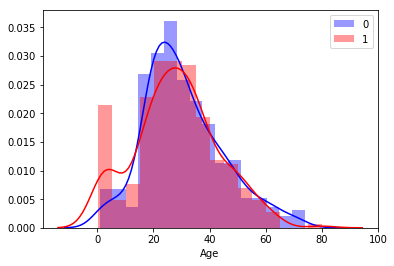

In [408]:
## data analysis
df = pd.read_csv("data/train.csv")
print(df.dtypes)
print(df.isna().sum()) # important: sum attribute of dataframe by default has axis=0 (for numpy axis=None)

## plotting
#sns.countplot(x="Sex", hue="Survived", data=df)
fig, fax = plt.subplots()
z = df[df.loc[:,"Survived"] == 0]["Age"]
sns.distplot(z[z.notna()], ax=fax, color="blue", label='0')
z = df[df.loc[:,"Survived"] == 1]["Age"]
sns.distplot(z[z.notna()], ax=fax, color="red", label='1')
plt.legend()

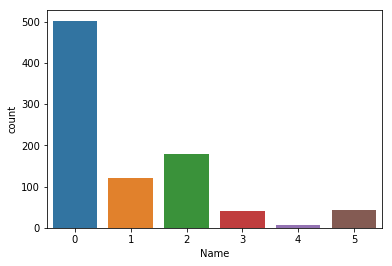

In [409]:
## mapping strings to numbers and normalizing
df.loc[:,"Sex"] = df.loc[:,"Sex"].map({"male":0, "female":1, 0:0, 1:1})
df.loc[:,"Embarked"] = df.loc[:,"Embarked"].map({'C':0, 'S':1, 'Q':2, 0:0, 1:1, 2:2})

## handling names
titleDict = {"Mr.":0, "Mrs.":1, "Miss.":2, "Master.":3, "Dr.":4}
for i_row, row in df.iterrows():
    if isinstance(row["Name"], int):
        break
    title = row["Name"].split()[1]
    if title in titleDict.keys():
        df.loc[i_row,"Name"] = titleDict[title]
    else:
        df.loc[i_row,"Name"] = len(titleDict.keys())
sns.countplot(x="Name", data=df)
        
## handling nans
df1 = df.drop(columns=["Cabin"])
df1 = df1.interpolate()
#df1 = df1.dropna()
#print(df1.shape)

## creating input and output dataframes
yf = df1["Survived"]
features= ["Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
#features= ["Pclass", "Sex", "Age"]
Xf = df1[features]

## normalizing
Xf_mean, Xf_std = Xf.mean(), Xf.std()
Xf = (Xf - Xf_mean) / Xf_std
Xf.insert(0, "cst", 1.)

In [410]:
## parameters
activation = sigmoid
n_iter = 1000
alpha = 0.10
reg = 1

## sample sizes
m, n = Xf.shape
i_m_test_lim = int(m * 0.8)
m_test = m - i_m_test_lim 
ynp_test = yf.loc[i_m_test_lim:].to_numpy()
Xnp_test = Xf.loc[i_m_test_lim:,:].to_numpy()

## gradient descent
m_train_arr = np.arange(100, i_m_test_lim, 15)
J_train_arr = []
J_test_arr = []
for i_m_train in range(len(m_train_arr)):
    m_train = m_train_arr[i_m_train]
    print(m_train)
    ynp_train = yf.loc[:m_train].to_numpy()
    Xnp_train = Xf.loc[:m_train,:].to_numpy()
    theta = getThetaGD(Xnp_train, ynp_train, n_iter, alpha, reg)
    J_train_arr.append(getCostShanon(Xnp_train, ynp_train, theta, reg))
    J_test_arr.append(getCostShanon(Xnp_test, ynp_test, theta, reg=0))

100
115
130
145
160
175
190
205
220
235
250
265
280
295
310
325
340
355
370
385
400
415
430
445
460
475
490
505
520
535
550
565
580
595
610
625
640
655
670
685
700


In [ ]:
fig, fax = plt.subplots()
fax.plot(m_train_arr, J_train_arr, label="train")
fax.plot(m_train_arr, J_test_arr, label="test")
plt.legend()
plt.show()